In [18]:
## setting the path to the datasets
import pandas as pd
datadir='../../Datasets/'

## required packages for this Chapter
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from collections import Counter
from statsmodels.distributions.empirical_distribution import ECDF as ecdf

In [19]:
X = pd.read_csv(datadir + "GridNorthAmerica\gridkit_north_america-highvoltage-vertices.csv")
D = pd.read_csv(datadir + "GridNorthAmerica\gridkit_north_america-highvoltage-links.csv")

tuples = [tuple(x) for x in D.values]
gr = ig.Graph.TupleList(tuples, directed=False)



Question 2

In [23]:
deg = gr.degree()
base_stats = [gr.vcount(), gr.ecount(), np.min(deg), np.mean(deg), np.median(deg), 
        np.quantile(deg, 0.99), np.max(deg), gr.diameter(), np.max(gr.connected_components().membership)+1, 
        gr.connected_components().giant().vcount(), sum([x==0 for x in gr.degree()]), gr.transitivity_undirected(mode='na'), 
        gr.transitivity_avglocal_undirected(mode='nan')]

S = []
S.append(['NA_grid'] + base_stats)
D = pd.DataFrame(S,columns=['graph','nodes','edges','min degree','mean degree','median degree',
                            'degree of 99% quantile','max degree','diameter','components','largest component',
                            '# of isolates','Global clustering coefficient','Local clustering coefficient']).transpose()

D


C:\Users\vince\AppData\Local\Temp\ipykernel_14788\415288316.py:4: DeprecationWarning: Partial string matches of enum members are deprecated since igraph 0.9.3; use strings that identify an enum member unambiguously.
  gr.connected_components().giant().vcount(), sum([x==0 for x in gr.degree()]), gr.transitivity_undirected(mode='na'),


,0
graph,NA_grid
nodes,28305
edges,22459
min degree,1
mean degree,1.586928
median degree,1.0
degree of 99% quantile,6.0
max degree,25
diameter,18
components,5846


Question 3: Consider the GitHub (ml) graph on 9,739 nodes
a. Find the number of walks of length 5.
b. Find the number of cycles of length 4 (induced, that is, without chords).

In [21]:
D_gh = pd.read_csv(datadir + 'GitHubDevelopers/musae_git_edges.csv')
tuples = [tuple(x) for x in D_gh.values]
gh = ig.Graph.TupleList(tuples, directed=False)

X = pd.read_csv(datadir+'GitHubDevelopers/musae_git_target.csv')

#Map node names in edgelist to indices in the graph
idx = [int(i) for i in gh.vs['name']]

lbl = ['web','ml']
gh.vs['lbl'] = [lbl[i] for i in list(X['ml_target'])]

gh_ml = gh.subgraph([v for v in gh.vs() if v['lbl'] == 'ml'])
gh_web = gh.subgraph([v for v in gh.vs() if v['lbl'] == 'web'])
print('GitHub nodes:',gh.vcount(),'; ml developers:',gh_ml.vcount(),'; web developers:',gh_web.vcount())


GitHub nodes: 37700 ; ml developers: 9739 ; web developers: 27961


In [8]:
def get_walks(graph, v_index, steps):

    valid_walks = 0
    if steps == 0:
        return 1

    neighbours = graph.neighbors(v_index)    
    for new_index in neighbours:        
        valid_walks += get_walks(graph, new_index, steps-1)

    return valid_walks

vseq = gh_ml.vs
num_5_walks = 0
for v in gh_ml.vs:    
    num_5_walks += get_walks(gh_ml, v.index, 5)    

print(f"Number of walks of length 5: {num_5_walks}")

9739
Number of walks of length 5: 1711269128


In [16]:
def get_cycles(graph, v_index, steps, node_list, seen_node_set):

    node_list.append(v_index)
    seen_node_set.add(v_index)

    valid_cycles = 0
    print(f"\nInfo")
    print(node_list[0])
    print(v_index)
    shortest_path_length = graph.distances(node_list[0], v_index)[0][0]
    print(f"Shortest length: {shortest_path_length}")
    print(f"Remaining steps: {steps}")    
    
    if steps == 0 and shortest_path_length > 1:
        print(f"Returning 1 case 1")
        return 1
    elif steps == 0 and shortest_path_length == 1:
        print(f"Returning 0 case 2")
        return 0
    elif steps == 0 and shortest_path_length == 0:
        print(f"Returning 1 case 3")
        return 1
    
    neighbours = graph.neighbors(v_index)
    print(f"neighbours: {neighbours}")
    for new_index in neighbours:
        if new_index not in seen_node_set and new_index != node_list[0]:
            valid_cycles += get_cycles(graph, new_index, steps-1, node_list, seen_node_set)
        
    print(f"List: {node_list}")
    print(f"returning {valid_cycles} case 4")
    return valid_cycles


# vseq = gh_ml.vs
# num_valid_cycles = 0
# for v in gh_ml.vs:
#     node_list = list()
#     num_valid_cycles += get_cycles(gh_ml, v.index, 4, node_list)    

# print(f"Number of chordless cycles of length 4: {num_valid_cycles}")

In [17]:
#Example graph
#g = ig.Graph(n=6, edges=[[0, 1], [1, 2], [2, 3], [3, 4]])
g = ig.Graph(n=4, edges= [[0, 2], [0, 3], [2, 1], [1, 3]])
print(g)
num_valid_cycles = 0
for v in g.vs:
    node_list = list()
    seen_node_set = set()
    num_valid_cycles += get_cycles(g, v.index, 4, node_list, seen_node_set)
    print(f"Node list is {node_list}")

print(f"Number of chordless cycles of length 4: {num_valid_cycles}")

IGRAPH U--- 4 4 --
+ edges:
0--2 0--3 1--2 1--3

Info
0
0
Shortest length: 0
Remaining steps: 4
neighbours: [2, 3]

Info
0
2
Shortest length: 1
Remaining steps: 3
neighbours: [0, 1]

Info
0
1
Shortest length: 2
Remaining steps: 2
neighbours: [2, 3]

Info
0
3
Shortest length: 1
Remaining steps: 1
neighbours: [0, 1]
List: [0, 2, 1, 3]
returning 0 case 4
List: [0, 2, 1, 3]
returning 0 case 4
List: [0, 2, 1, 3]
returning 0 case 4
List: [0, 2, 1, 3]
returning 0 case 4
Node list is [0, 2, 1, 3]

Info
1
1
Shortest length: 0
Remaining steps: 4
neighbours: [2, 3]

Info
1
2
Shortest length: 1
Remaining steps: 3
neighbours: [0, 1]

Info
1
0
Shortest length: 2
Remaining steps: 2
neighbours: [2, 3]

Info
1
3
Shortest length: 1
Remaining steps: 1
neighbours: [0, 1]
List: [1, 2, 0, 3]
returning 0 case 4
List: [1, 2, 0, 3]
returning 0 case 4
List: [1, 2, 0, 3]
returning 0 case 4
List: [1, 2, 0, 3]
returning 0 case 4
Node list is [1, 2, 0, 3]

Info
2
2
Shortest length: 0
Remaining steps: 4
neighbours: 

Question 4: Consider the airport graph5 found in the additional material from
the book's web site under Datasets/Airport/airport data.csv.
The first 3 fields are: the origin, the destination and, respectively,
the number of passengers. This graph is weighted and directed; the
weight of a directed edge uv corresponds to the number of passengers
travelling from airport u to airport v.

Plot the cumulative degree distribution

In [5]:
X = pd.read_csv(datadir + "Airports/airports_loc.csv")
D = pd.read_csv(datadir + "Airports/connections.csv")

tuples = [tuple(x) for x in D.values]
air_gr = ig.Graph.TupleList(tuples, directed=True)
air_gr.vs['airport'] = list(X['airport'])
air_gr.vs['lon'] = list(X['lon'])
air_gr.vs['lat'] = list(X['lat'])
air_gr.vs['state'] = list(X['state'])
air_gr.vs['city'] = list(X['city'])


X
  airport         lon        lat state         city
0     ABE  -75.440804  40.652100    PA    Allentown
1     ABI  -99.681900  32.411301    TX      Abilene
2     ABQ -106.609001  35.040199    NM  Albuquerque
3     ABR  -98.421799  45.449100    SD     Aberdeen
4     ABY  -84.194504  31.535500    GA       Albany
D
  orig_airport dest_airport  total_passengers
0          SFO          LAX           1442105
1          LAX          SFO           1438639
2          MCO          ATL           1436625
3          ATL          MCO           1424069
4          LAX          JFK           1277731
['name', 'airport', 'lon', 'lat', 'state', 'city']


Slope is 0.17556384212236112


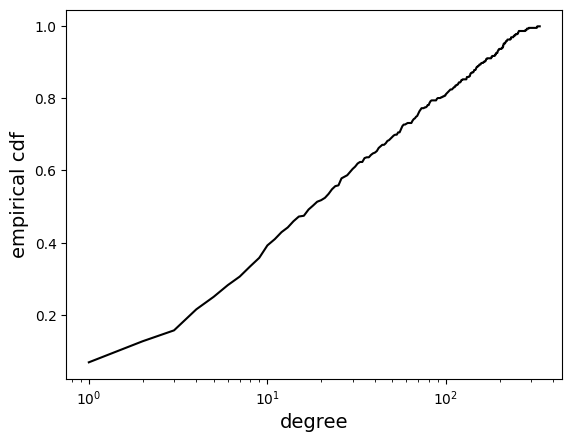

In [61]:
deg = air_gr.degree()
e = ecdf(deg)
x = np.arange(1,max(deg),1)
y = [e(i) for i in x]
slope, intercept = np.polyfit(np.log(x), y, 1)
print(f"Slope is {slope}")
plt.semilogx(x,y,'-',color='black',label='GitHub')
plt.xlabel('degree',fontsize=14)
plt.ylabel('empirical cdf',fontsize=14)
plt.show()

In [38]:
# b. Find the busiest airport. In other words, find the node with the maximum total degree

v_set = air_gr.vs()
max_deg = 0
max_v = 0
for v in v_set:

    total_deg = len(v.in_edges()) + len(v.out_edges())
    if total_deg > max_deg:
        max_deg = total_deg
        max_v = v

print(max_v)
print(f"Busiest airport is {max_v["name"]} with degree: {max_deg}")

igraph.Vertex(<igraph.Graph object at 0x000001DB1AF99440>, 3, {'name': 'ATL'})
Busiest airport is: 336


In [50]:
# c. Find # strongly connected components
components = air_gr.connected_components(mode="strong")
print(f"# of strongly connected components is 40, as indicated by summary: {components.summary()}")

# of strongly connected components: Clustering with 464 elements and 40 clusters


In [25]:
# d. Find the subgraph induced by all airports from California. Find the number of isolated nodes in this subgraph.

sub_gr_vs = air_gr.vs.select(state_eq="CA")
sub_gr = air_gr.subgraph(sub_gr_vs)

isolated_nodes = set()
for v in sub_gr.vs:
    #print(v.degree())
    if v.degree() == 0:
        isolated_nodes.add(v)

print(f"# isolated nodes: {len(isolated_nodes)}")

# isolated nodes: 18


Question 5: 
Take 100 random pairs of nodes in the European Grid network. For
each pair plot a point (x; y), where x is the graph distance between
the two nodes and y is the corresponding geographical distance (in
kilometres). Is there a correlation between the two distances? In
order to compute the geographical distance you may, for example,
use function geodesic from geopy package or implement it from
scratch using the haversine formula that determines the great-circle
distance between two points on a sphere given their longitudes and
latitudes.

In [7]:
%pip install geopy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\src\DS_8014\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [21]:
from geopy import distance

## read edge list for the grid network and build undirected graph
gr = ig.Graph.Read_Ncol(datadir+'GridEurope/gridkit_europe-highvoltage.edges', directed=False)
gr = gr.simplify()

## read the vertices along with some of the attributes
X = pd.read_csv(datadir+'GridEurope/gridkit_europe-highvoltage.vertices')
idx = [int(i) for i in gr.vs['name']]
sorterIndex = dict(zip(idx,range(len(idx))))
X['Rank'] = X['v_id'].map(sorterIndex)
X.sort_values(['Rank'], ascending=[True],inplace=True)
X.dropna(inplace=True)
gr.vs['lon'] = list(X['lon'])
gr.vs['lat'] = list(X['lat'])
gr.vs['type'] = list(X['typ'])
gr.vs['layout'] = [(v['lon'],v['lat']) for v in gr.vs()] ## tuples with lat/lon
gr.vs['size'] = 3
gr.es['color'] = 'grey'
gr.vs['color'] = 'black'

# newport_ri = (41.49008, -71.312796)
# cleveland_oh = (41.499498, -81.695391)
# print(distance.distance(newport_ri, cleveland_oh).km)

7394
[48.08346681609]
100
100


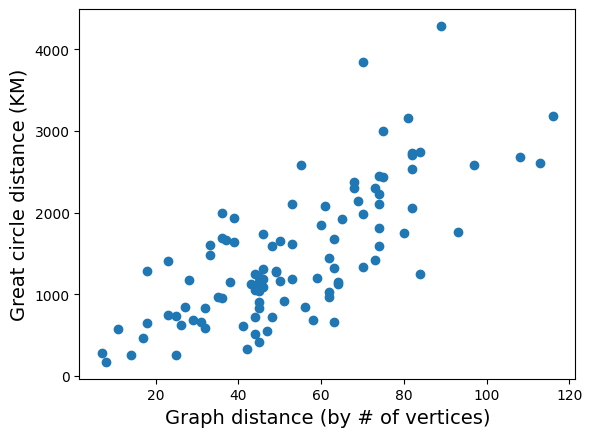

In [36]:
from collections import Counter
sg = gr.connected_components().giant()
V = np.random.choice(sg.vcount(), size=200, replace=False)
V_1 = V[0:100]
V_2 = V[100:200]
print(V_1[0])
print(sg.vs(int(V_1[0]))["lat"])
sp = []
dist = []
for i in range(0,100):    
    sp.extend(sg.distances(V_1[i], V_2[i])[0])    
    lat_1 = float(sg.vs(int(V_1[i]))["lat"][0])
    lon_1 = float(sg.vs(int(V_1[i]))["lon"][0])
    lat_2 = float(sg.vs(int(V_2[i]))["lat"][0])
    lon_2 = float(sg.vs(int(V_2[i]))["lon"][0])
    loc_1 = (lat_1, lon_1)
    loc_2 = (lat_2, lon_2)    
    point_dist = distance.distance(loc_1, loc_2).km    
    dist.append(point_dist)

print(len(sp))
print(len(dist))

plt.scatter(sp, dist)
plt.xlabel('Graph distance (by # of vertices)',fontsize=14)
plt.ylabel('Great circle distance (KM)',fontsize=14);
plt.show()




Q5 ANSWER

As we can see in our graph, there is a loosely linear correlation between our graph distance and our physical distance. 